- [**Exploratory Data Analysis with Seaborn**](#Exploratory-Data-Analysis-with-Seaborn)
- [**Tipos de las variables**](#Tipos-de-las-variables)
    - [**1. Analisis univariante**](#1.-Análisis-univariante)
        - [**1.1 Variables cuantitativas**](#1.1-Variables-cuantitativas)
        - [**1.2 Variables cualitativas**](#1.2-Variables-cualitativas)
    - [**2. Analisis Bivariante**](#2.-Análisis-Bivariante)
        - [**2.1 Comparativa de variables cuantitativas**](#2.1-Comparativa-de-variables-cuantitativas-(2-4-variables))
        - [**2.2 Comparativa de múltiples numéricas**](#2.2-Comparativa-de-múltiples-numéricas)
        - [**2.3 Comparativa de dos variables cualitativas**](#2.3-Comparativa-de-dos-variables-cualitativas)
        - [**2.4 Cualitativa vs cuantitativa**](#2.4-Cualitativa-vs-cuantitativa)

### Enlaces de interés:
- [¿Cómo interpretar un boxplot?](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
- [¿Cómo puedo usar Matplotlib object oriented interface con Seaborn?](https://stackoverflow.com/questions/23969619/plotting-with-seaborn-using-the-matplotlib-object-oriented-interface)
- [¿Por qué en la gráfica de la función de densidad a veces incluye valores negativos?](https://stats.stackexchange.com/questions/109549/negative-density-for-non-negative-variables)

[**Seaborn**](https://seaborn.pydata.org/) es una librería de visualización de datos de Python basada en matplotlib. Esta nos permite hacer interfaces de alto nivel con gráficas atractivas pero también estadísticamente informativas. 

# Exploratory Data Analysis with Seaborn
Entender cómo se hacen las gráficas en python está muy bien, pero lo importante es saber cuándo usarlas. En este notebook no se pretende explicar todos los tipos de gráficas que hay (histogramas, scatter plots, heatmaps...), en primer lugar porque es imposible abarcarlo todo, y en segundo lugar porque hay que ir un paso atrás antes de elegir la gráfica, ya que tenemos que comprender de qué tipo son los datos y qué es lo que estamos buscando con cada gráfica.

Por tanto, primero tendremos que identificar el tipo de los datos y cuántas variables vamos a representar
- Una varibale numérica
- Una variable categórica
- Dos variables numércias
- Tres o más variables numércias
- Dos variablees categóricas
- Variables numércias y categóricas

Teniendo claro esto, junto con un buen catálogo de gráficas, lo tendremos mucho más fácil.

https://www.data-to-viz.com/

In [2]:
# Importamos todos los paquetes que vayamos a necesitar
from sklearn.datasets import load_iris, fetch_california_housing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris_df = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
iris_df['target']=load_iris()['target_names'][load_iris()['target']]

boston_df = pd.DataFrame(fetch_california_housing()['data'],columns=fetch_california_housing()['feature_names'])
boston_df['target'] = fetch_california_housing()['target']

titanic_df = pd.read_csv('data/titanic.csv',sep=',')

market_df = pd.read_csv('data/supermarket_sales.csv')

suicid_df = pd.read_csv('data/suicide.csv')


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
market_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
suicid_df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Tipos de las variables
Antes de representar cualquier variable es imprescindible comprender qué tipo de datos queremos representar. Tenemos los siguientes:
nominal = sin orden

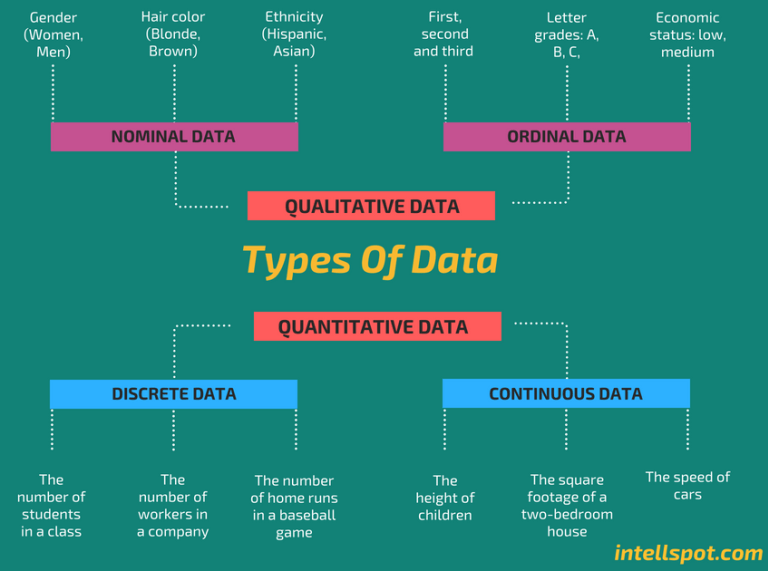

## 1. Análisis univariante
### 1.1 Variables cuantitativas
Si queremos ver cómo se distribuyen los precios de venta de tickets del Titanic.
#### Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Este tipo de gráficas nos sirven para ver la distribución de los datos, donde se concentran más, ¿es dispersa? ¿tiene asimétrica? ¿por qué? ¿Hay outliers?

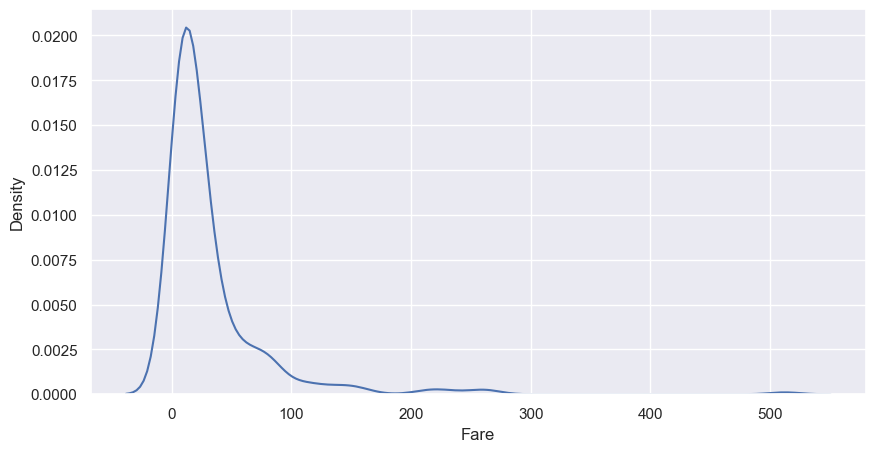

In [7]:
# DISTRIBUCION DEL PRECIO DE LOS BILLETES
plt.figure(figsize=(10,5))
sns.distplot(titanic_df['Fare'], hist = False);  #hist = false para que no me muestre el histograma

#### Histograma
También podemos verlo en un histograma

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

Los histogramas dan la frecuencia de aparición de todos los valores. Muy similar al diagrama de densidad anterior. La diferencia es que ahora el eje y es un conteo y no la probabilidad de aparición de los valores de la variable.

<Axes: xlabel='Fare'>

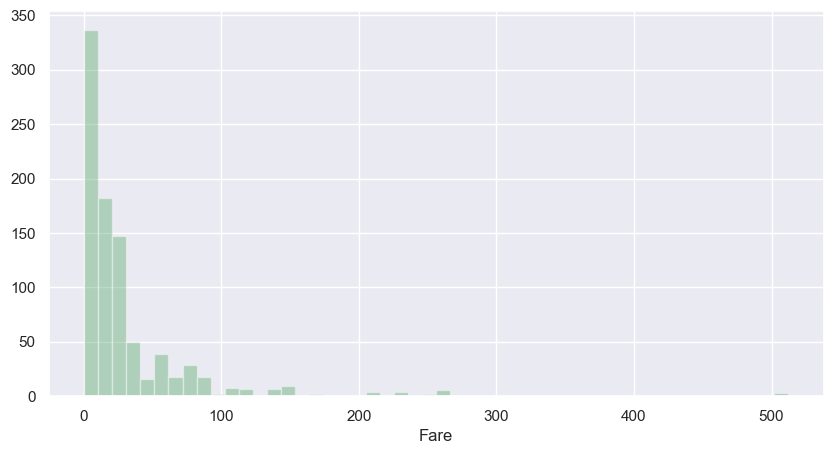

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(titanic_df.Fare, kde = False, color='g')

DISTRIBUCIÓN:
ES LEPTOPCURTICA
ASIMETRIA POSITIVA, LA MODA ESTÁ A LA IZQ.
CURTOSIS

Podemos agrupar (visualmente) una variable numérica. Podría ser una posible categorización de los billetes

<Axes: xlabel='Fare'>

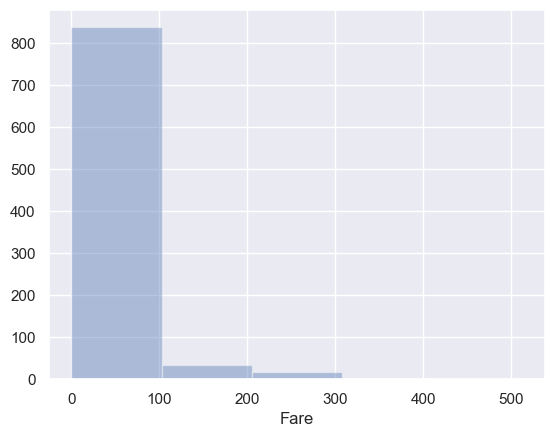

In [9]:
plt.figure()
sns.distplot(titanic_df.Fare, kde=False, bins=5)
# BINS = PARTES IGUALES

#### Histograma + Densidad

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

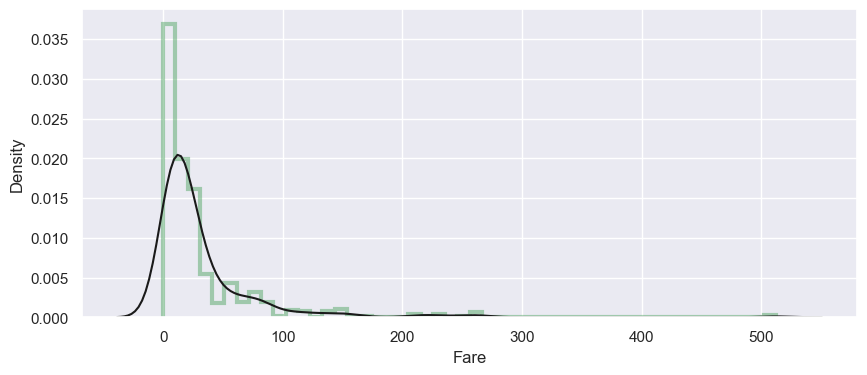

In [10]:
plt.figure(figsize=(10,4))
sns.distplot(titanic_df.Fare,
            kde_kws={'color':'k'},#color de la linea
            hist_kws={'histtype':'step', 'linewidth':3,
                     'alpha':0.5, 'color':'g'}, bins = 50); #alpha es la transparencia. Step en el hysttype es para poner una linea o que aparezca  cada barra (solo cambio visual)Bins cuanto mayor más divisiones.


In [11]:
titanic_df['Fare'].mean()
# la curva empieza en menos 0 solo para graficar, pero no hay valores ahí.

32.204207968574636

Otra manera muy visual de ver la concentración de los valores es mediante el argumento `rug`

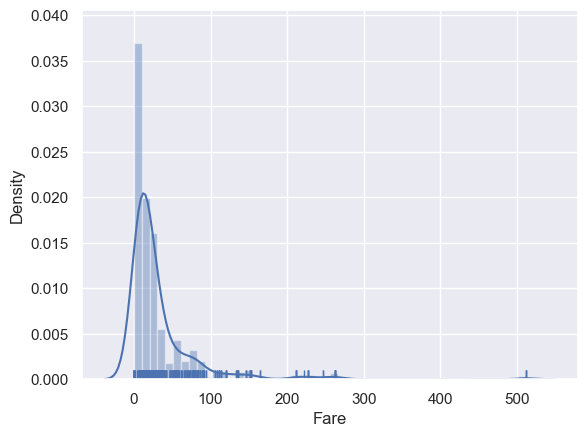

In [12]:
plt.figure()
sns.distplot(titanic_df.Fare,rug=True);
# concentración de datos en ese punto

#### Boxplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

Los boxplots dan una información muy parecida a los gráficos vistos anteriormente, aunque en este caso destaca mucho más los outliers.

<Axes: xlabel='Fare'>

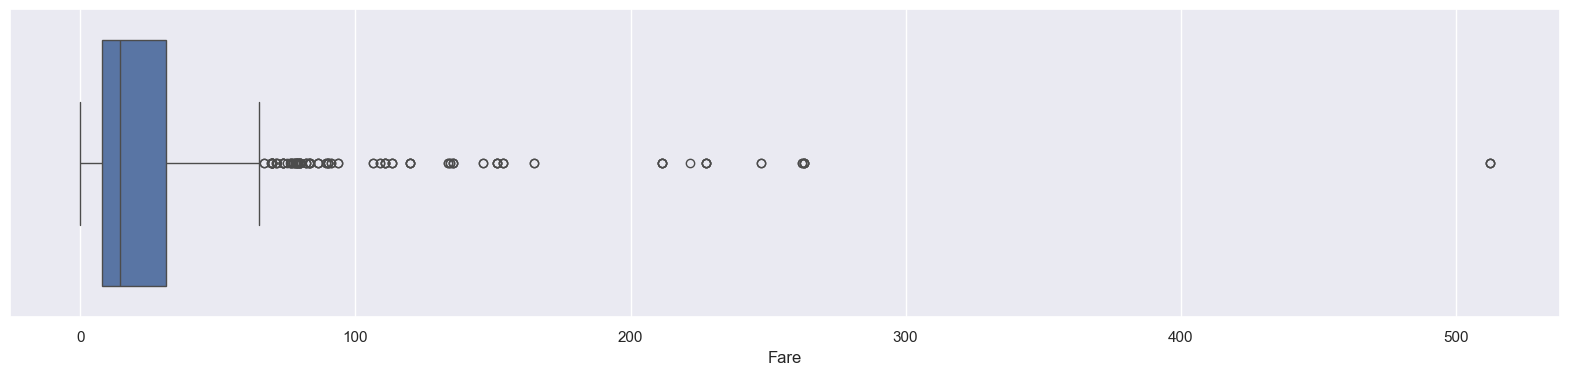

In [13]:
plt.figure(figsize=(20,4))
sns.boxplot(titanic_df.Fare, orient='h')
# aquí si se ve qie el mínimo es 0
# hay mayor cncentración en el primer cuartil que hacia la derecha. asi no es una distrib normal. la MEDIANA SIEMPRE ESTÁ EN EL MEDIO DE LA CANTIDAD DE DATOS.

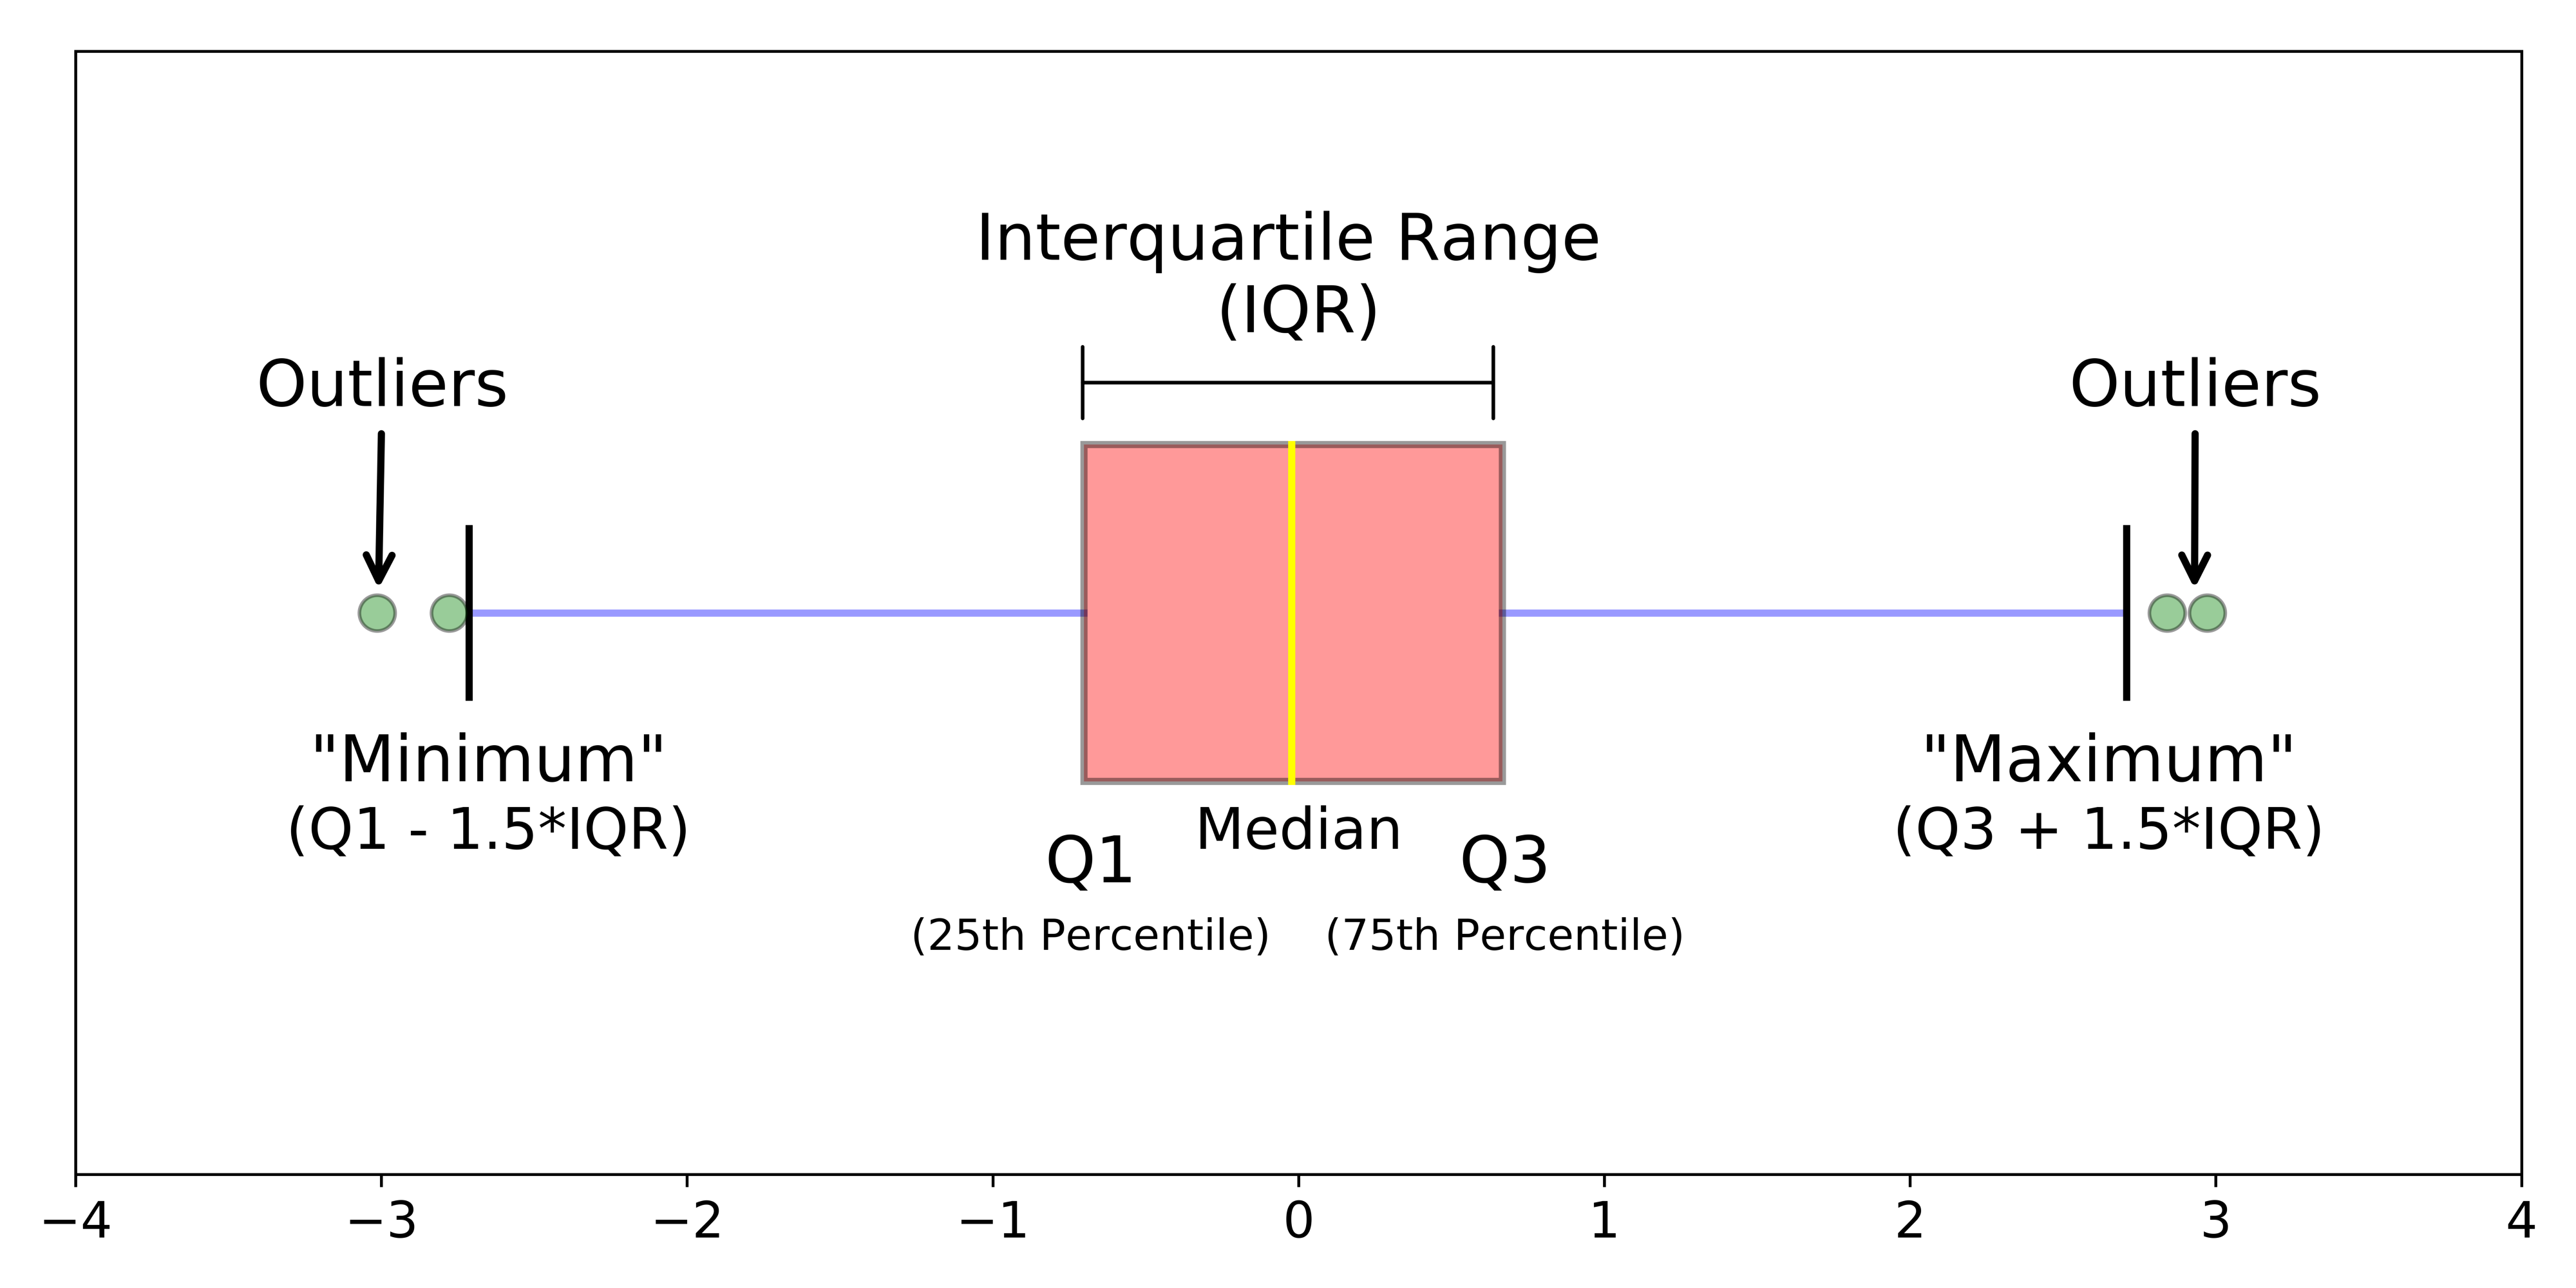

#### Violinplot

[Colores de Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

[Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

Igual que un diagrama de caja, pero en este caso tiene la función de distribución en lugar de la propia caja

<Axes: xlabel='Fare'>

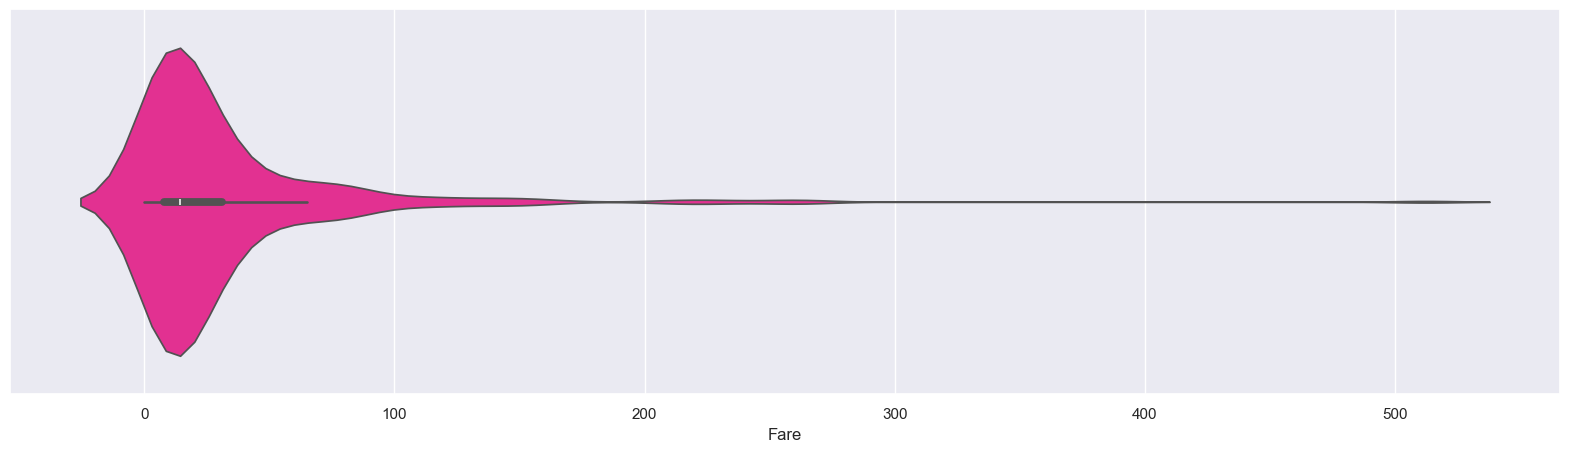

In [14]:
plt.figure(figsize=(20,5))
sns.violinplot(titanic_df.Fare, color='deeppink', orient='h')
# PUNTO BLANCO ES LA MEDIANA. Esa mediana es la moda también, porque justo ahi hay mas concentración de datos.

<Axes: ylabel='Fare'>

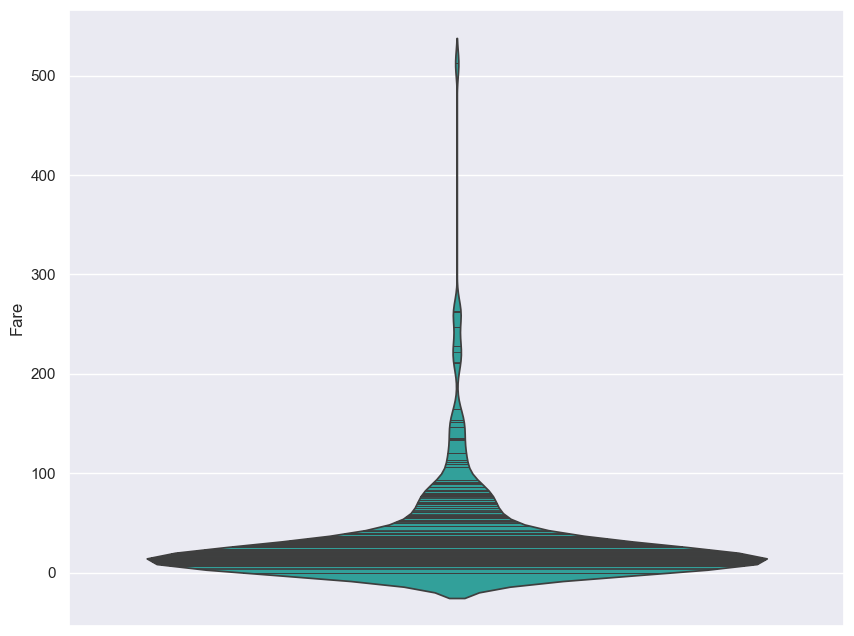

In [15]:
plt.figure(figsize=(10,8))
sns.violinplot(titanic_df['Fare'], color = 'lightseagreen',
              inner = 'stick')
            #   la linea marca cada dato real que existe, lo verde significa que no hay datos.

### 1.2 Variables cualitativas
Para representar una variable categórica tendremos que ver su frecuencia de valores

En este caso vamos a ver qué tipo de embarque ha sido el más frecuente.

[Documentacion](https://seaborn.pydata.org/generated/seaborn.countplot.html)

nunique() = len(unique()) para saber cuántos valores unicos hay, no sus valores.

CARDINALIDAD : número de elementos distintos en una columna, en porcentaje.
es importante para saber si esuna variable cualitativa interesante para el estudio. Ej nombres, todos son elem, unicos, top...no interesa hacer calculos


In [16]:
titanic_df.select_dtypes(exclude='object')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [17]:
for i in titanic_df.select_dtypes('object'): #podriamos poner tb include = 'object'
    print(f'la cardinalidad de {i} es {titanic_df[i].nunique()/len(titanic_df)*100} %')


la cardinalidad de Name es 100.0 %
la cardinalidad de Sex es 0.22446689113355783 %
la cardinalidad de Ticket es 76.43097643097643 %
la cardinalidad de Cabin es 16.4983164983165 %
la cardinalidad de Embarked es 0.33670033670033667 %


No nos interesa calcular la cardinalidad del 100% ni la del 76%. 
Cuando la cardinalidad es baja es que no hay muchos valores unicos (el nombre es alto porque todos son únicos)

In [18]:
titanic_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

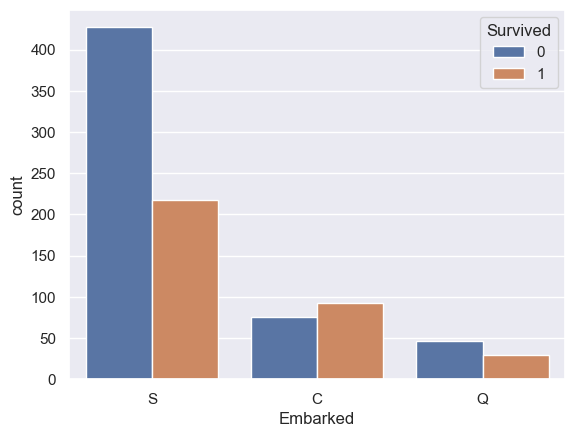

In [19]:
plt.figure()
sns.countplot(x='Embarked', data=titanic_df, hue = 'Survived') #gráfico de lo de justo arriba.
# parametro hue de countplot() es IMPORTANTE, así como data. HUE es para añadir el estudio de otra variable que tenga relacion con la primera del grafico.
#  Tienen que  ser variables con pocos tipos valoes unicos, como el sexo o si sobrevivieron o no.

#### Lollipop

¿Cuáles han sido los productos más pedidos?

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hlines.html)

In [20]:
conteo = market_df['Product line'].value_counts()
conteo

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

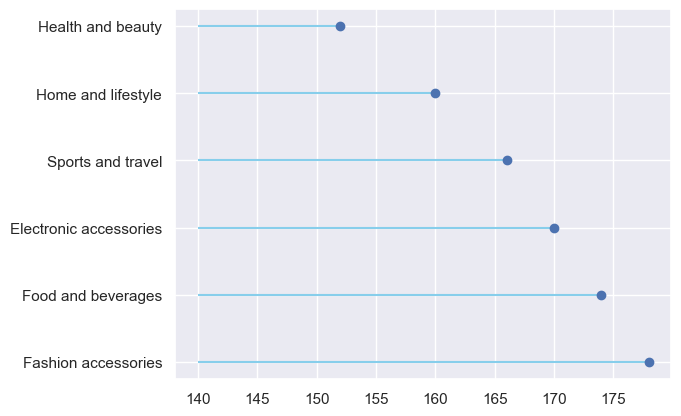

In [21]:
plt.figure()
plt.hlines(y=conteo.index,
          xmin=140,xmax=conteo, 
          color='skyblue')
plt.plot(conteo, conteo.index, 'o') #si quitamos la 'o', aparecerá una línea que une los puntos finales de las lineas. Este tipo de graficos se suelen hacer en horizontal

#### Donut chart/Pie chart

[Documentación](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html)

NO SE SUELEN UTILIZAR   

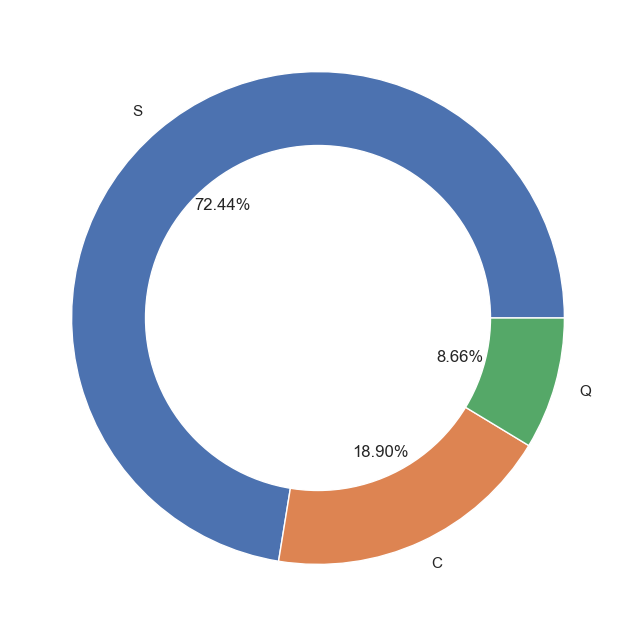

In [22]:
data = titanic_df['Embarked'].value_counts()

circle = plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8,8))
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')

p = plt.gcf() # hace referencia a la figura activa
p.gca().add_artist(circle)

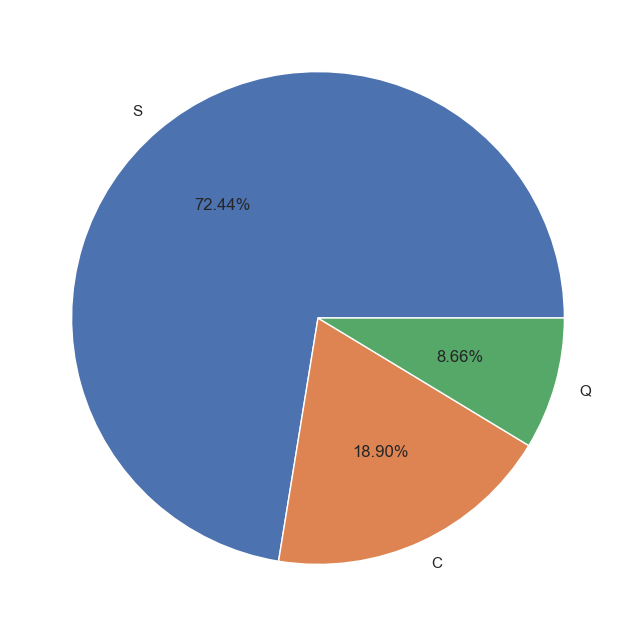

In [23]:
# pie chart
plt.figure(figsize = (8,8))
plt.pie(data.values,
       labels = data.index,
       autopct='%1.2f%%');

## 2. Análisis Bivariante
### 2.1 Comparativa de variables cuantitativas (2-4 variables)
#### Boxplot

En este ejemplo veremos cómo de diferentes son las distribuciones de las 4 características que definen a una flor.

[Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

PODEMOS VER LAS DIERENTES DISTRIBUCIONES DE 4 CARACTERISTICAS DE UNA FLOR POR EJ.

<Axes: >

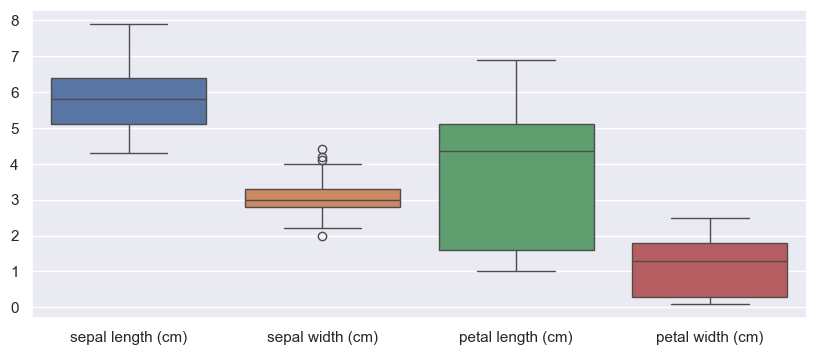

In [24]:
plt.figure(figsize=(10,4))
sns.boxplot(data=iris_df.iloc[:,0:4])

El boxplot está bien, pero hay algo de información que se nos escapa: ¿qué es?


<Axes: >

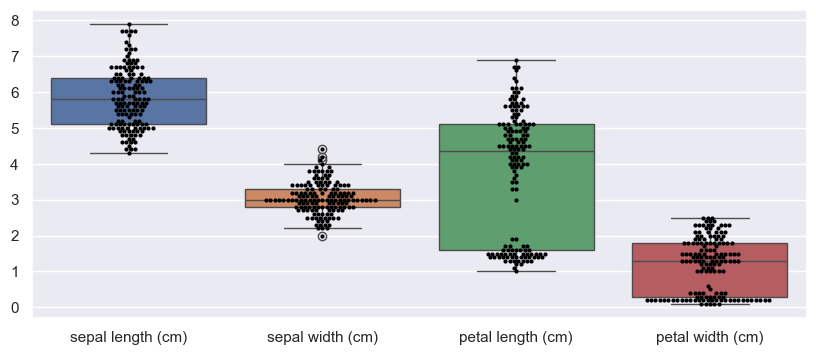

In [25]:
plt.figure(figsize=(10,4))
sns.boxplot(data=iris_df.iloc[:,0:4])
sns.swarmplot(data=iris_df.iloc[:,0:4],color='black',s=3)  #los puntos son las densidades de cada variable. Con el violiln lo vemos mejor

<Axes: >

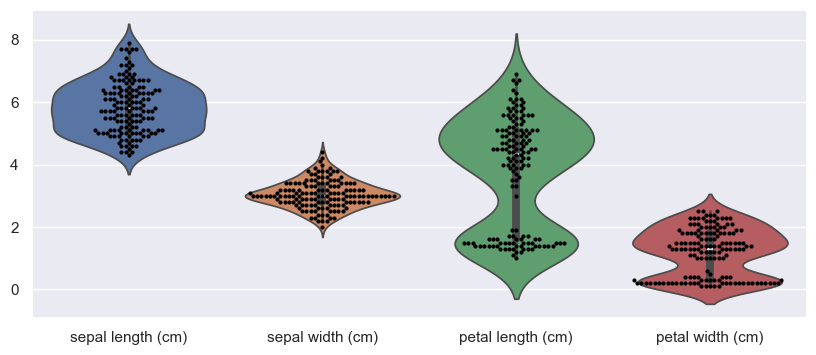

In [26]:
plt.figure(figsize=(10,4))
sns.violinplot(data=iris_df.iloc[:,0:4])
sns.swarmplot(data=iris_df.iloc[:,0:4],color='black',s=3)

Si el grafico de violin lo partimos por la mitad en vertical, lo que queda a cada lado sería el grafico de la distribución de los datos. 

#### Diagramas de densidad

Otra manera de ver cómo se distribuyen las características de las flores.

[Documentación](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

<Axes: ylabel='Density'>

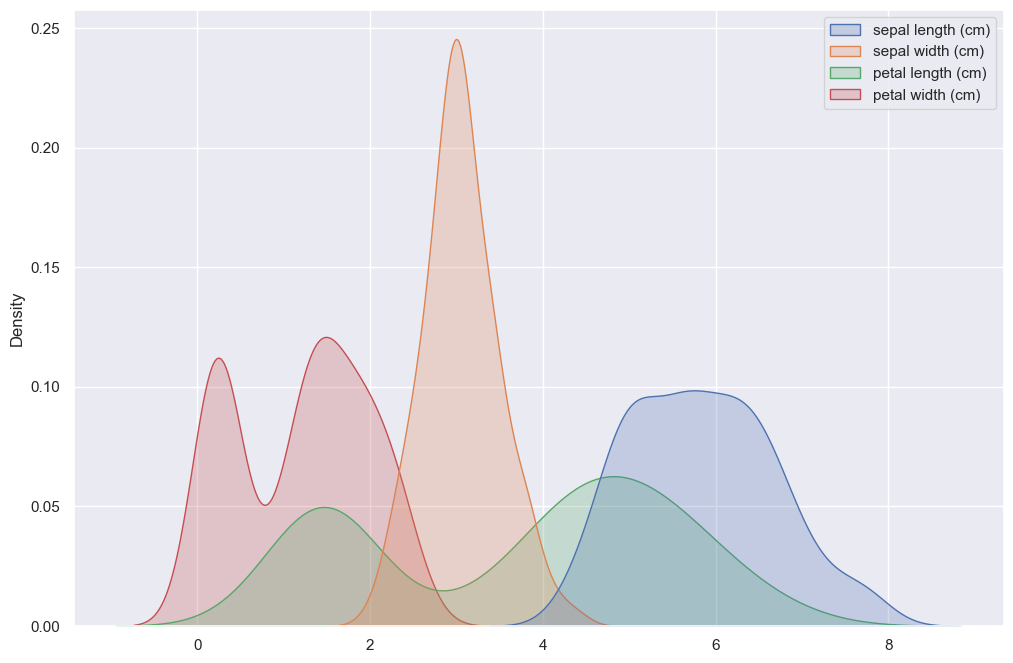

In [27]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=iris_df.iloc[:,0:4],shade=True) #shade para rellenar las lineas
# estas graficas son los violines 'doblados' por la mitad. en el grafico de violin hay mucha informaciçon de un solo vistazo, puede sobre saturar de información a una persona que no esté acostumbrada


#### Histogramas

[Documentación](https://seaborn.pydata.org/generated/seaborn.distplot.html)

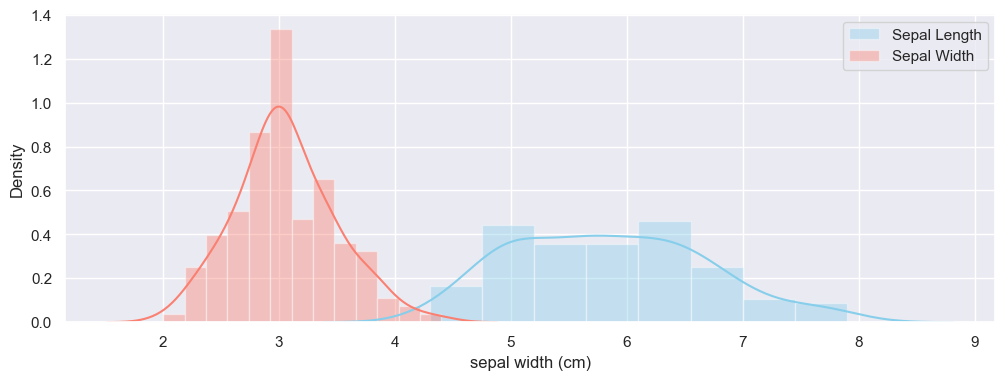

In [28]:
plt.figure(figsize=(12,4))
sns.distplot(iris_df['sepal length (cm)'],color='skyblue', label='Sepal Length')
sns.distplot(iris_df['sepal width (cm)'], color='salmon', label='Sepal Width')
plt.legend()

# si quisiera dos graficos podemos hacerlo con un subplot

In [29]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

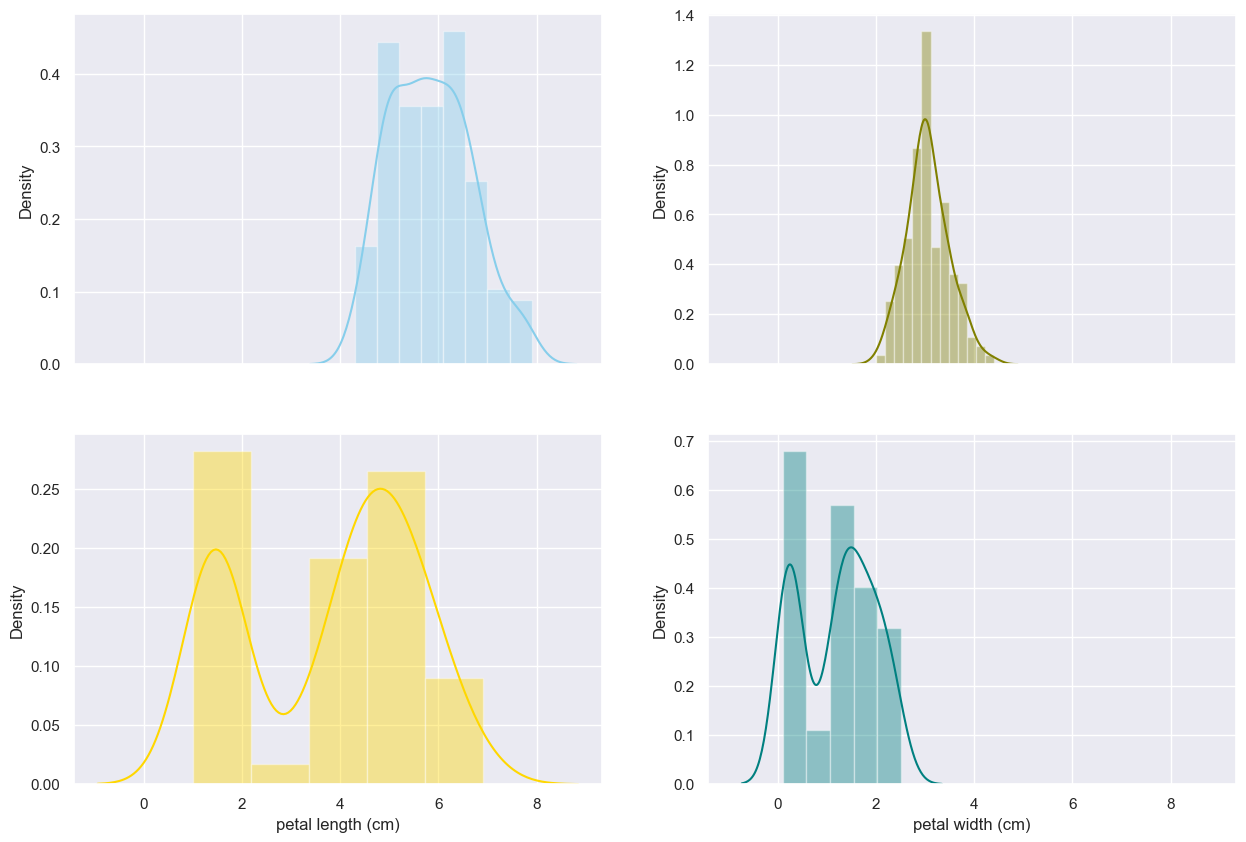

In [30]:
f,ax = plt.subplots(2,2,figsize=(15,10),sharex=True)
sns.distplot(iris_df['sepal length (cm)'],color='skyblue',ax=ax[0,0])
sns.distplot(iris_df['sepal width (cm)'],color='olive',ax=ax[0,1])
sns.distplot(iris_df['petal length (cm)'],color='gold',ax=ax[1,0])
sns.distplot(iris_df['petal width (cm)'],color='teal',ax=ax[1,1]);


#### Scatter plot

En este ejemplo se ve claramente cómo estas dos variables sirven para distinguir las setosas de los otros tipos

[Documentación](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [31]:
iris_df['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [32]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

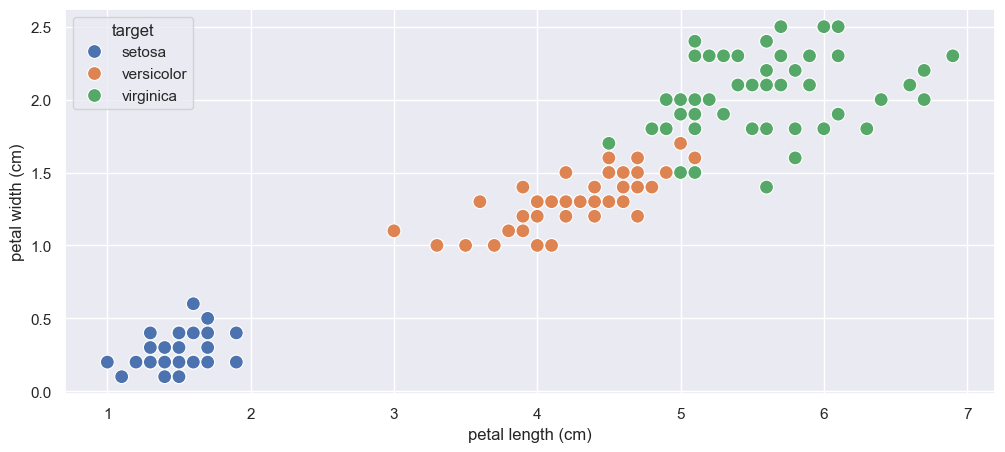

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=iris_df['petal length (cm)'],
                y=iris_df['petal width (cm)'],
               hue=iris_df['target'], s=100);
            #si no coloco el hue sale todo de un único color

[Documentación dataset](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

% poblacion con poco poder adquisitivo vs media de habitaciones por vivienda

In [34]:
boston_df= pd.read_csv('data/BostonHousing.csv')

In [35]:
boston_df.columns = boston_df.columns.str.upper()

In [36]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


En el joinplot arriba siempre es la distribución. (en el lateral creo que tb, consultar document)

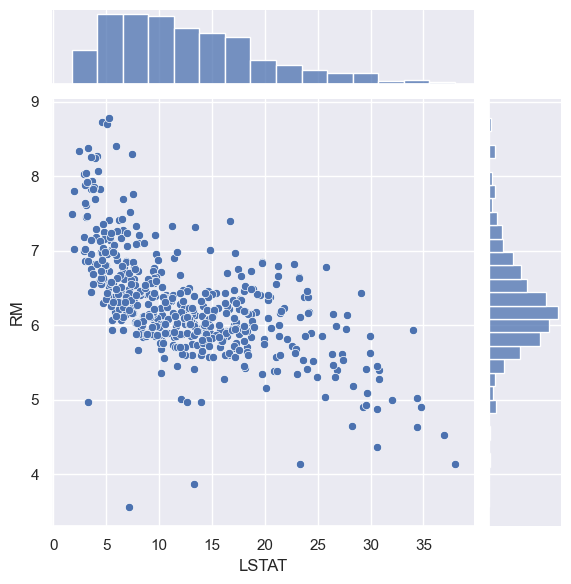

In [37]:
sns.jointplot(x = boston_df['LSTAT'], y = boston_df['RM'])

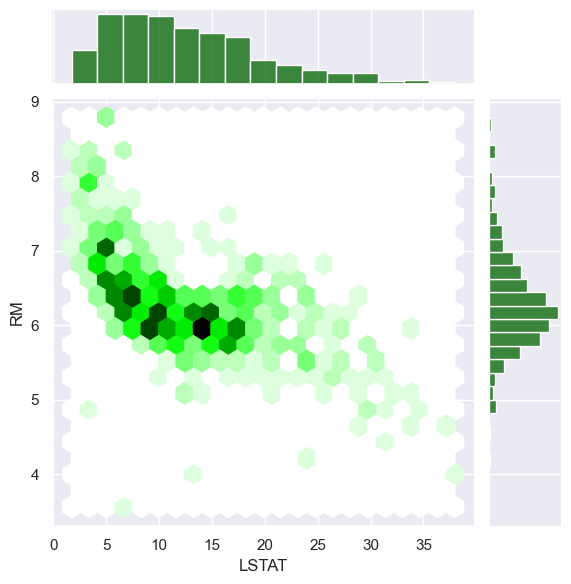

In [38]:
sns.jointplot(x = boston_df['LSTAT'], y = boston_df['RM'],
             color='darkgreen', kind='hex') #kind = 'hex' pinta los exagonos de dif colores donde hay más concentración. 
             

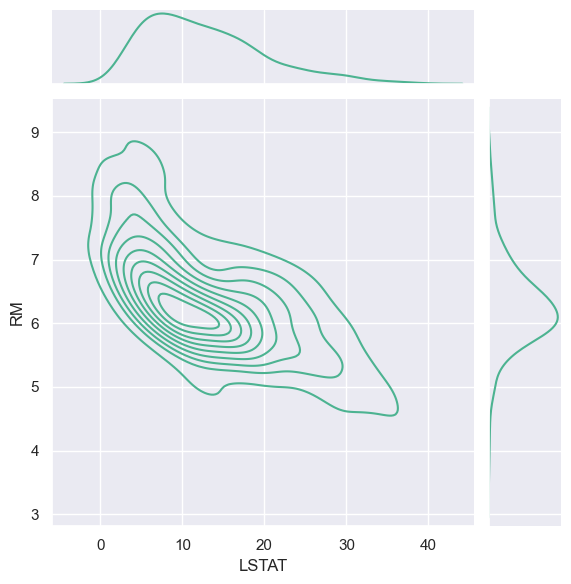

In [39]:
sns.jointplot(x = boston_df['LSTAT'],
             y = boston_df['RM'],
            kind = 'kde',
             color = '#4CB391')

### 2.2 Comparativa de múltiples numéricas

#### Heatmaps

Los heatmaps son perfectos para representar una matriz de correlación

[Documentación heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

correlación 1 y -1 es muy correlacionados. 0 es qu eno hay relación.

PARA CORRELACIONES :
-   DATOS LINEALES =  COEF DE PEARSON Y SPEARMAN SON IGUALES
-   DATOS NO LINEALES = MEJOR COEF DE SPEARMAN

In [40]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


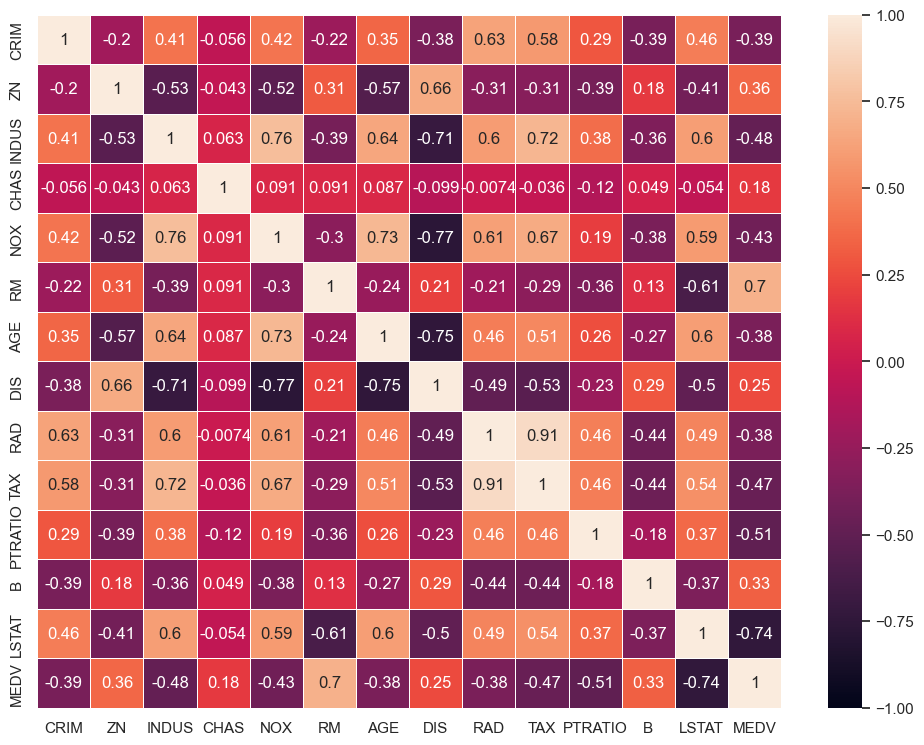

In [41]:
plt.figure(figsize=(12,9))
sns.heatmap(boston_df.corr(),
           vmin=-1,vmax=1,annot=True,linewidths=0.5);
# ESTABLECEMOS los valores minimos y máximos para que meta el espectro entero, no termine en los valores max y min del DF.
# Es simetrica si corto la matriz por al diagonal principal y ambos lados son iguales, en espejo

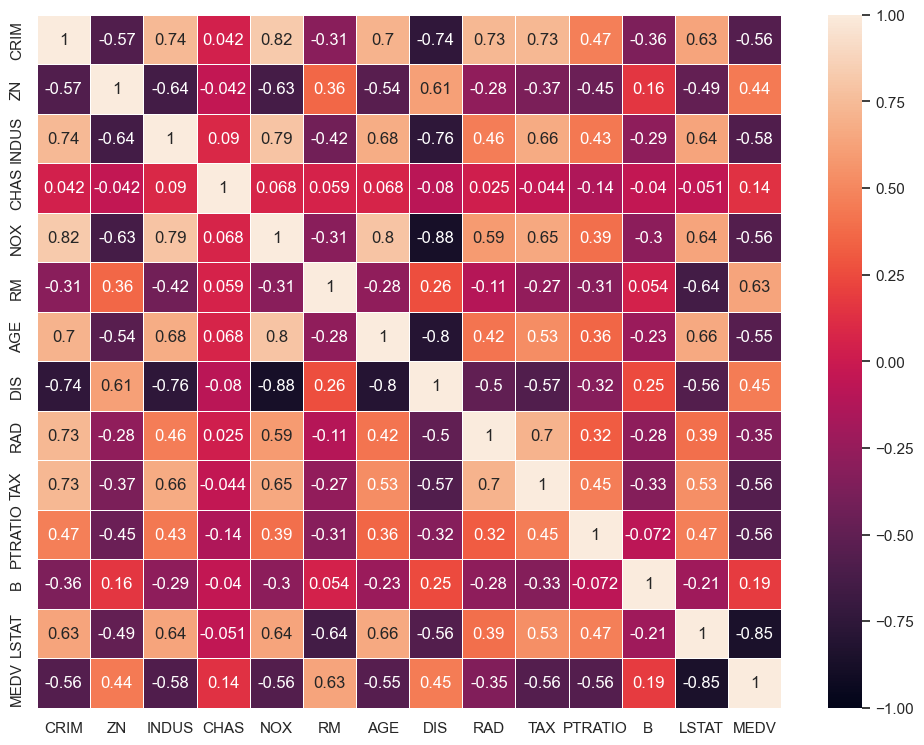

In [70]:
plt.figure(figsize=(12,9))
sns.heatmap(boston_df.corr(method='spearman'),
           vmin=-1,vmax=1,annot=True,linewidths=0.5);

In [71]:
plt.figure(figsize=(12,9))
sns.heatmap(titanic_df.corr(),
           vmin=-1,vmax=1,annot=True,linewidths=0.5);
# PARA CONJUNTOS DE DATOS CUALIT Y CUANTIT. HAY QUE EXCLUIR LOS CUALIT

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1200x900 with 0 Axes>

<Axes: >

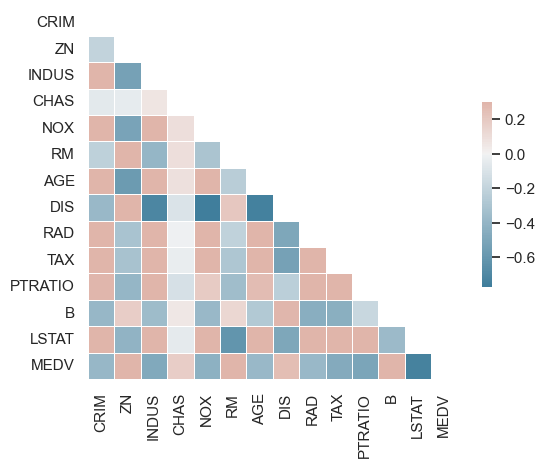

In [73]:
sns.set_theme(style="white")

# Generate a custom diverging colormap/GAMA DE COLORES
cmap = sns.diverging_palette(230, 20, as_cmap=True)

mask = np.triu(np.ones_like(boston_df.corr(), dtype=bool)) #np.triu devuelve un grafico con la parte de abajo de la matriz con una diagonal de 1s (la parte de abajo del de calor) ASI EVITAMOS INFFO DOBLE

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(boston_df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


También nos permite comparar una variable numérica vs dos variables categóricas. Por ejemplo la cantidad de suicidios desagregado por edades y paises.

Se recomienda que las dos variables categóricas tengan pocos casos, porque sino no se va a ver bien el heatmap.

AQUI HABRIA QUE HACER LA CARDINALIDAD PARA COMPROBAR SI TIENE POCOS UNICOS O NO

In [74]:
# dos categoricas una numerica
data = suicid_df.groupby(['country', 'age']).sum()['suicides_no'].unstack()
data_filtrado = data.loc[['Italy', 'Spain', 'Portugal', 'Belgium', 'Czech Republic']]
data_filtrado

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
country,,,,,,
Italy,8571.0,16115.0,39250.0,400.0,43314.0,24410.0
Spain,7559.0,13373.0,30331.0,354.0,29807.0,18778.0
Portugal,1505.0,2590.0,6535.0,85.0,8189.0,5157.0
Belgium,4475.0,8731.0,24300.0,216.0,16887.0,8152.0
Czech Republic,3596.0,5498.0,16885.0,174.0,12042.0,5492.0


<Axes: xlabel='age', ylabel='country'>

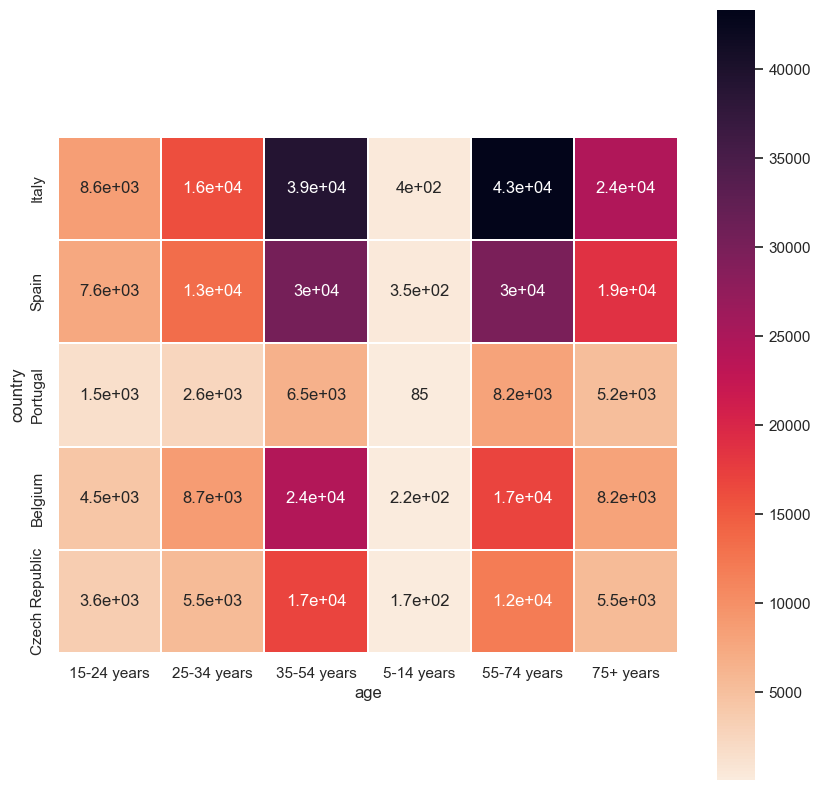

In [77]:
plt.figure(figsize=(10,10))
sns.heatmap(data_filtrado, square = True, linewidths = .3, cmap = sns.cm.rocket_r, annot=True)
# no da correlación, si no que pais tiene mas suicidios frente a los otros

#### Correlograma

[Documentación Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Interesante gráfica para ver en un dataset qué variables presentan correlación lineal, así como sus distribuciones. NO realices esta gráfica con muchas varaibles porque no se va a ver bien. Hazlo por partes.

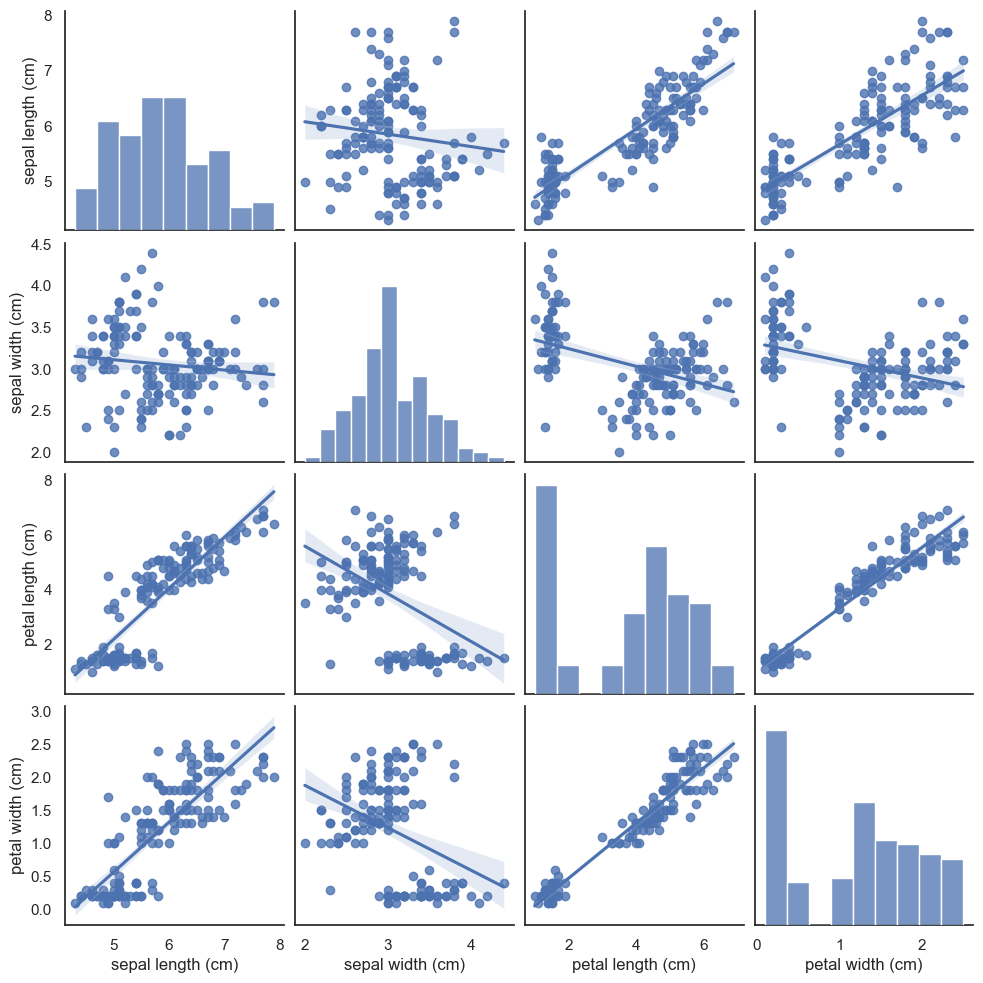

In [78]:
sns.pairplot(iris_df, kind='reg')

en la diagonal principal da las distribuciones. en el resto, las tendencias. Las sombras indican el rango de error de cada linea.

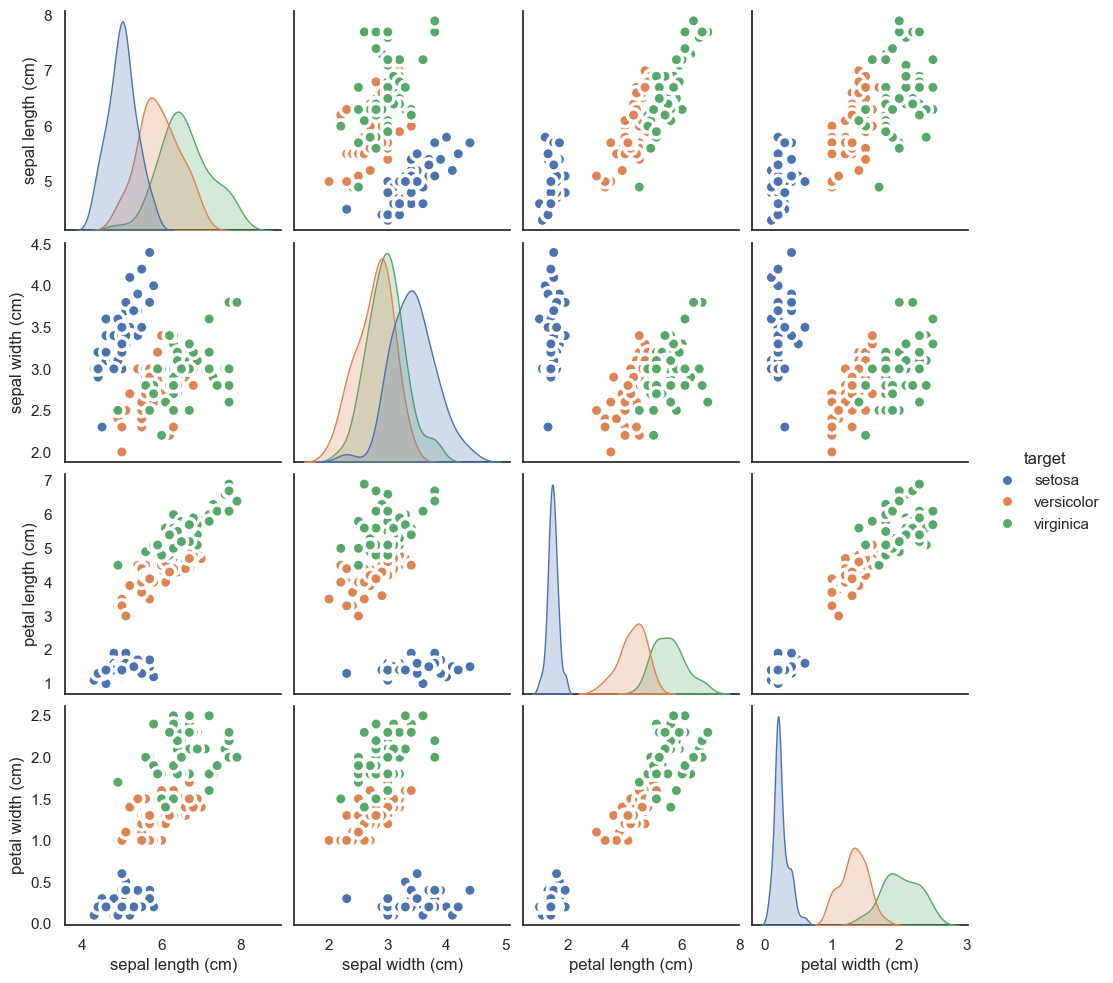

In [79]:
sns.pairplot(iris_df, kind='scatter', hue='target',
            plot_kws=dict(s=80, edgecolor='white',linewidth=2.5))

### 2.3 Comparativa de dos variables cualitativas
#### Tabla

[Documentacion](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html)

Lo más sencillo, una tabla con la frecuencia de valores. Esto es factible cuando los elementos únicos por categoría no son muchos.

In [80]:
pd.crosstab(titanic_df['Embarked'],titanic_df['Sex'])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


#### Diagrama de barras

[Documentacion](https://seaborn.pydata.org/generated/seaborn.catplot.html)

En un diagrama de barras también se entiende la representación de dos variables cualitativas

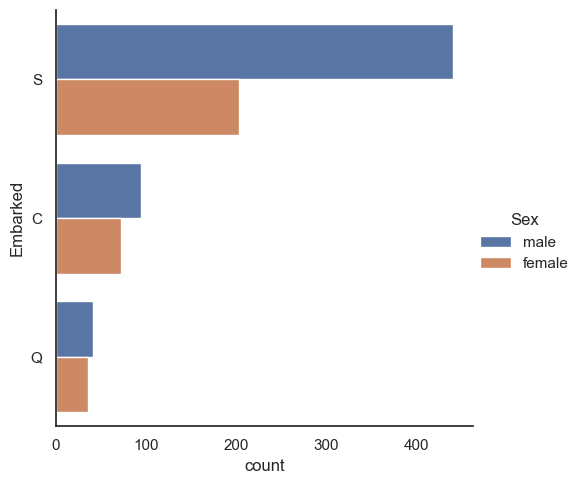

In [81]:
sns.catplot(y='Embarked',hue='Sex',kind='count',edgecolor='0.6',
            data=titanic_df)

Otra manera de visualizar dos o más variables categóricas

<Figure size 3000x1000 with 0 Axes>

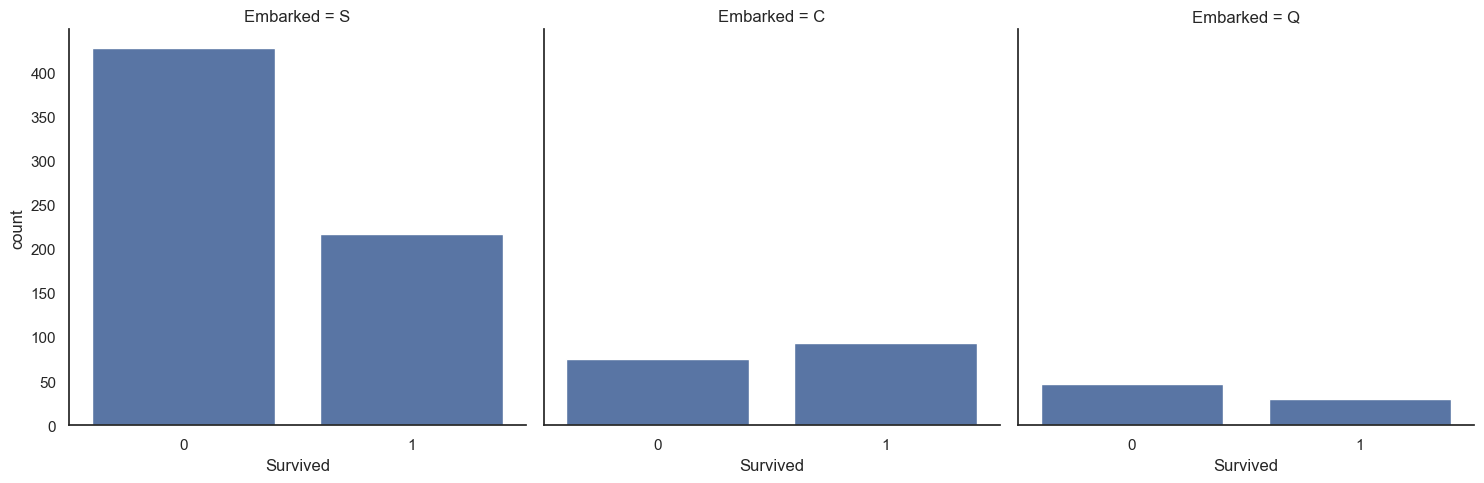

In [82]:
plt.figure(figsize=(30,10));
sns.catplot(x='Survived', 
           col = 'Embarked',
           col_wrap = 3,
           data = titanic_df,
           kind = "count")

In [84]:
df_plot = titanic_df.groupby(['Survived','Embarked']).size().unstack()
df_plot

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


<Axes: xlabel='Survived'>

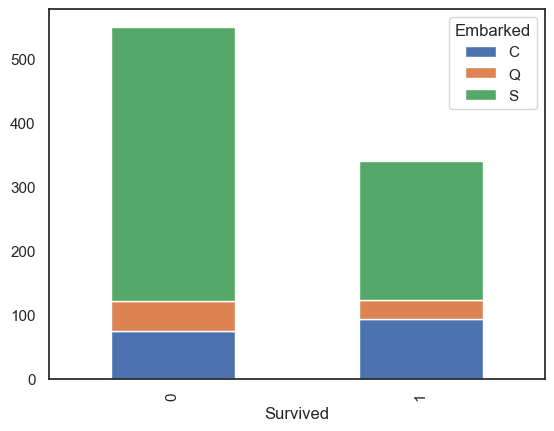

In [85]:
df_plot.plot(kind='bar',stacked=True)

### 2.4 Cualitativa vs cuantitativa
#### Time series

[Documentacion](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

Las series temporales tienen la particularidad de que son datos ordenados

In [87]:
suicid_df2 = suicid_df.loc[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]
suicid_df2 = suicid_df2.groupby(['country', 'year']).sum()
suicid_df2.reset_index(inplace=True)
suicid_df2.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,France,1985,malemalemalemalefemalefemalemalefemalefemalefe...,75+ years55-74 years35-54 years25-34 years75+ ...,12501,51382600,348.90,France1985France1985France1985France1985France...,8.892,"553,138,414,367553,138,414,367553,138,414,3675...",129180,G.I. GenerationG.I. GenerationSilentBoomersG.I...
1,France,1986,malemalemalemalefemalefemalefemalemalefemalefe...,75+ years55-74 years35-54 years25-34 years75+ ...,12529,51637600,351.77,France1986France1986France1986France1986France...,0.000,"771,470,783,218771,470,783,218771,470,783,2187...",179280,G.I. GenerationG.I. GenerationSilentBoomersG.I...
2,France,1987,malemalemalemalefemalefemalefemalemalefemalefe...,75+ years55-74 years35-54 years25-34 years75+ ...,12161,51900800,331.03,France1987France1987France1987France1987France...,0.000,"934,173,305,686934,173,305,686934,173,305,6869...",215988,G.I. GenerationG.I. GenerationSilentBoomersG.I...
3,France,1988,malemalemalemalefemalefemalefemalemalefemalefe...,75+ years55-74 years35-54 years25-34 years75+ ...,11599,52157600,312.72,France1988France1988France1988France1988France...,0.000,"1,018,847,043,2771,018,847,043,2771,018,847,04...",234408,G.I. GenerationG.I. GenerationSilentBoomersG.I...
4,France,1989,malemalemalemalefemalefemalemalefemalefemalefe...,75+ years55-74 years35-54 years25-34 years75+ ...,11715,52417900,312.53,France1989France1989France1989France1989France...,0.000,"1,025,211,803,4141,025,211,803,4141,025,211,80...",234696,G.I. GenerationG.I. GenerationSilentBoomersG.I...


<Axes: xlabel='year', ylabel='suicides/100k pop'>

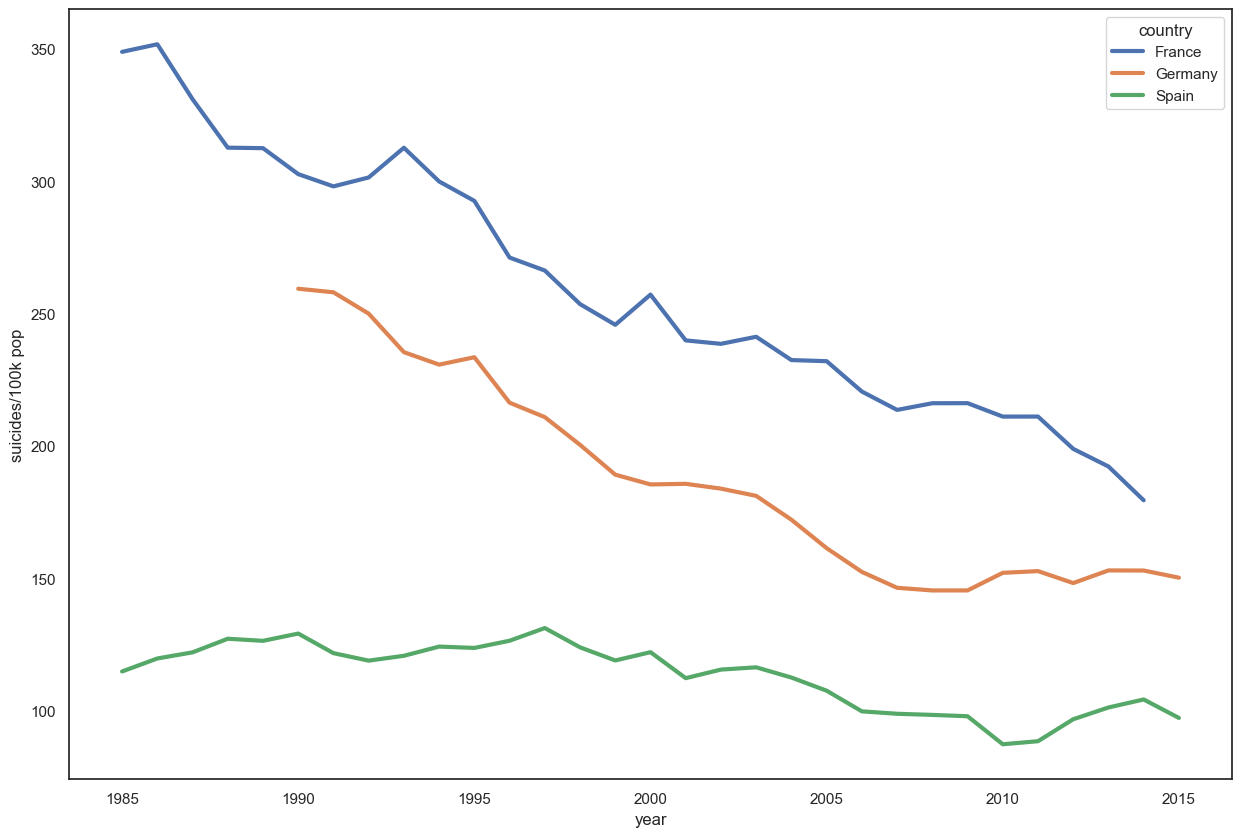

In [88]:
plt.figure(figsize=(15,10))
sns.lineplot(data = suicid_df2,
            x = 'year',
            y = 'suicides/100k pop',
            hue = 'country',
            linewidth = 3)

#### Treemap
Un treemap es una opción muy interesante para mostrar una variable numérica vs una categórica

In [54]:
#hay que instalar la librería squarify

In [89]:
!pip install squarify

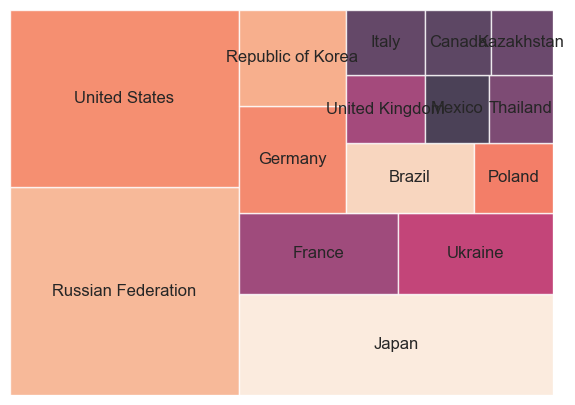

In [92]:
import squarify
plt.figure(figsize=(7,5))
data = suicid_df.groupby("country").sum()['suicides_no'].sort_values(ascending=False)[:15]

squarify.plot(sizes=data.values,
             label=data.index,
             alpha=.8)
plt.axis('off')
plt.show()

las personas que menos se suicidan son los rusos. 

**Bubblechart**

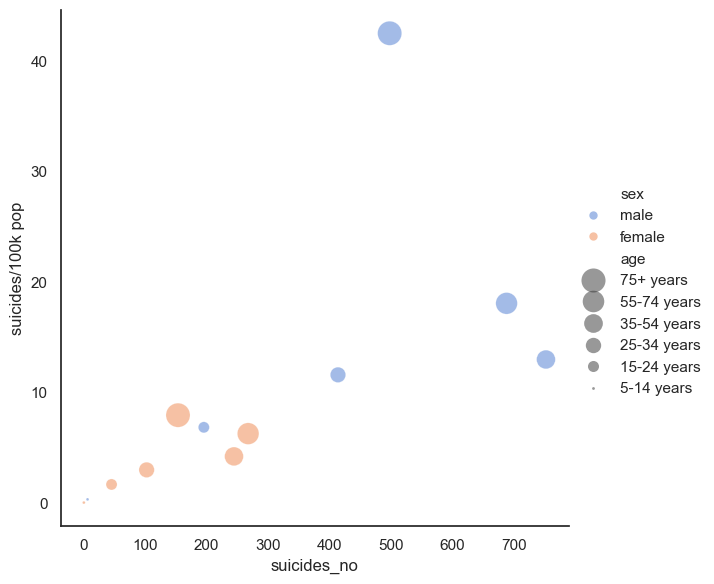

In [93]:
suicid_df2 = suicid_df[suicid_df['country-year'] == 'Spain2002']

sns.relplot(data=suicid_df2,
            x="suicides_no",
            y="suicides/100k pop",
            hue="sex", size="age",
            sizes=(4, 300),
            alpha=.5, palette="muted",
            height=6);

**A partir de aquí te dejo que seas tú el que le eches un ojo al resto de opciones.**

Con este catplot obtenemos la dispersión de la variable Age, por cada grupo de la categoría.

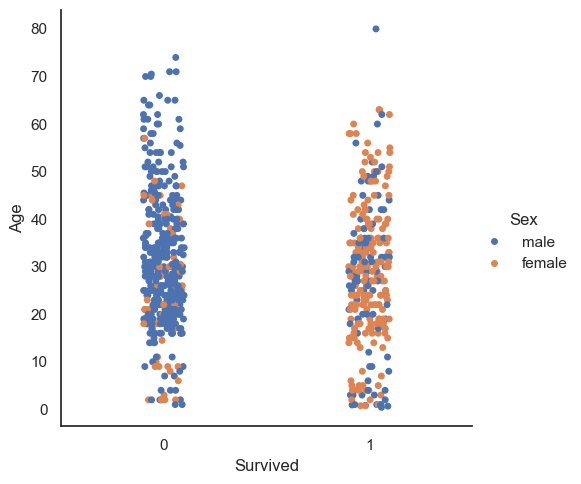

In [58]:
sns.catplot(x = 'Survived',
           y = 'Age',
           hue = 'Sex',
           data = titanic_df);

El equivalente con un diagrama de caja sería el siguiente

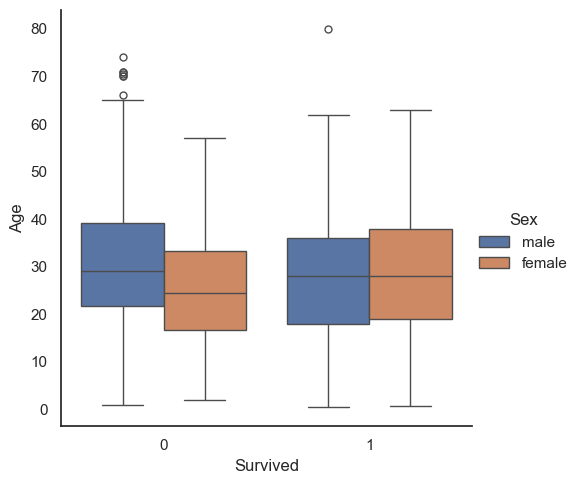

In [59]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="box", data=titanic_df);

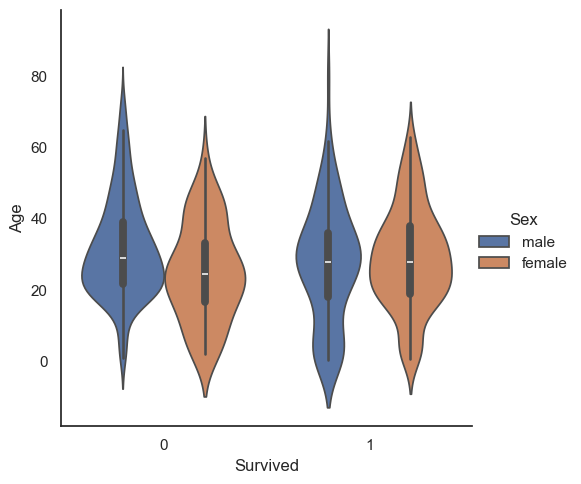

In [94]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", data=titanic_df);

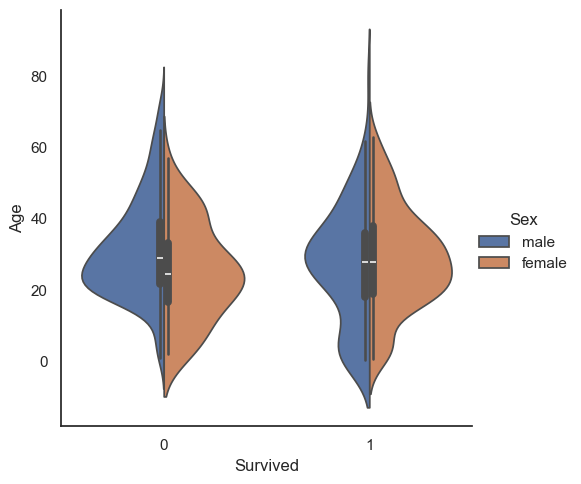

In [95]:
sns.catplot(x="Survived", y="Age", hue="Sex", kind="violin", split = True, data=titanic_df);

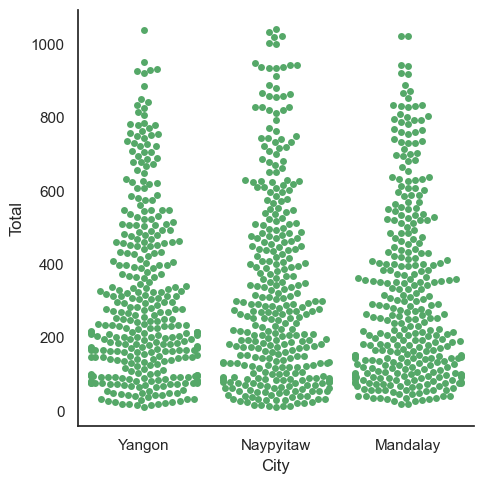

In [97]:
sns.catplot(x="City", y="Total", kind="swarm", data=market_df, color = 'g');

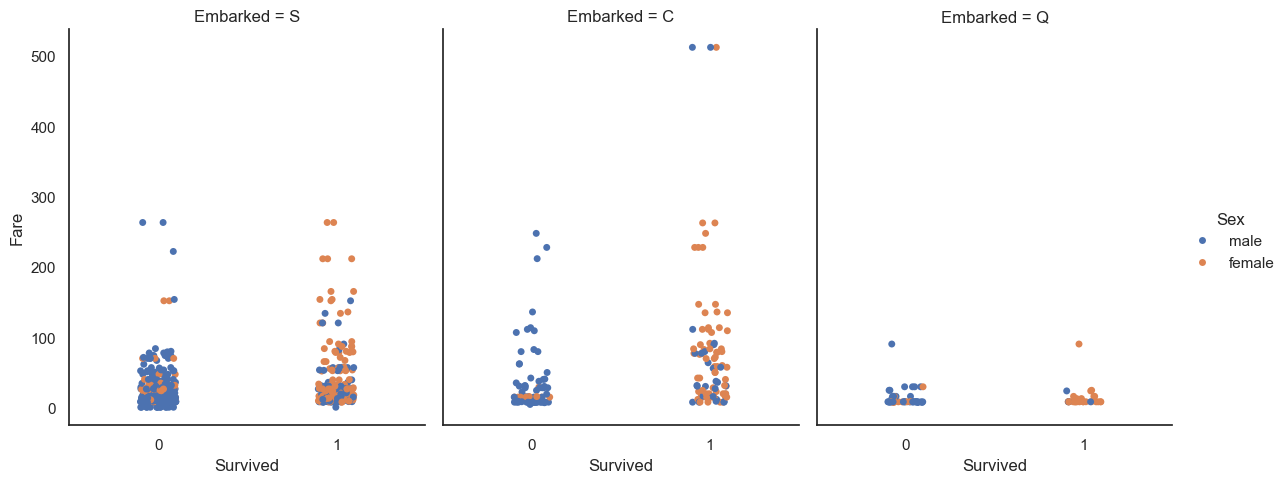

In [63]:
sns.catplot(x="Survived",
            y="Fare",
            hue="Sex",
            col="Embarked",
            data=titanic_df,
            height=5,
            aspect=.8);

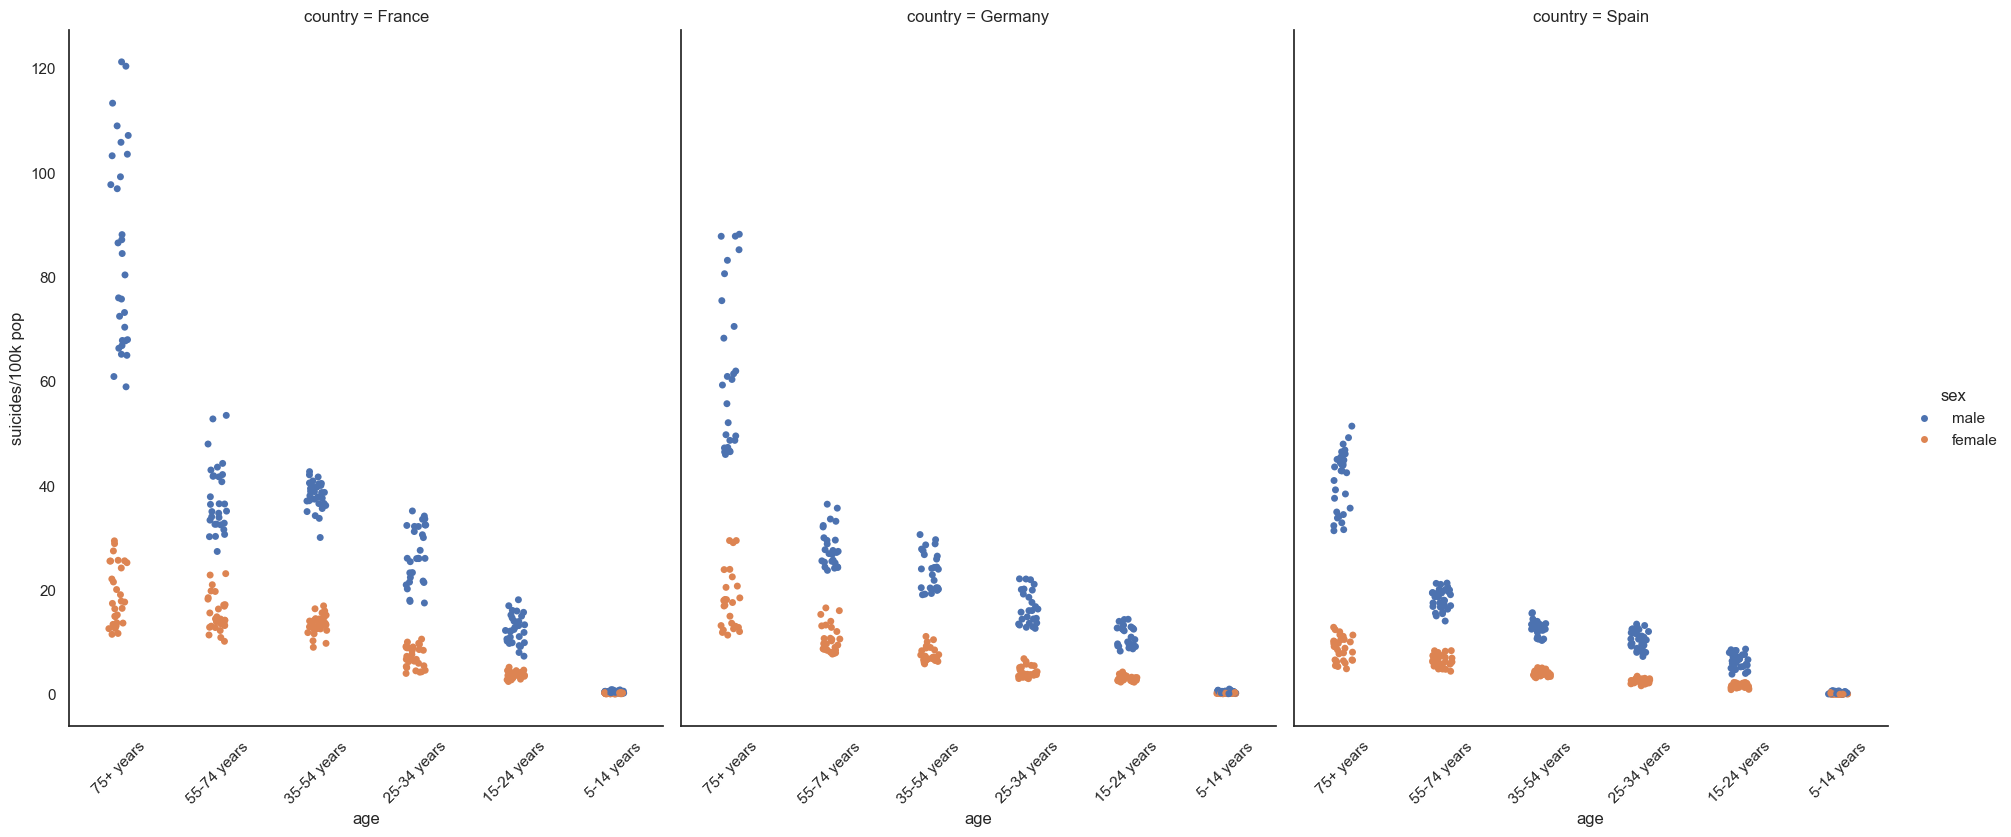

In [64]:
suicid_df2 = suicid_df[suicid_df['country'].isin(['Spain', 'Germany', 'France'])]

chart = sns.catplot(x = 'age',
                   y = 'suicides/100k pop',
                   hue = 'sex',
                   col = 'country',
                   data = suicid_df2,
                   height = 8,
                   aspect = 0.8)

chart.set_xticklabels(rotation=45);

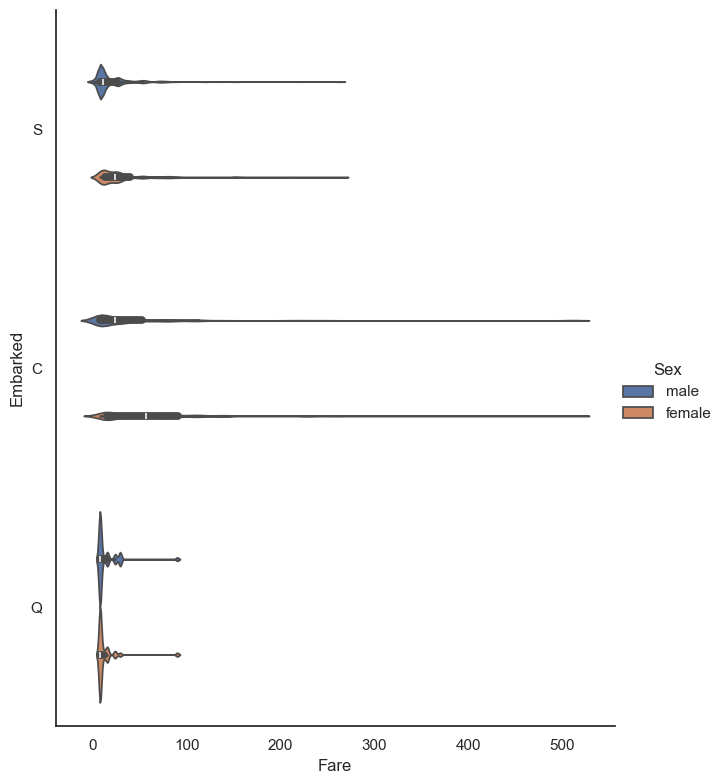

In [65]:
sns.catplot(x="Fare",
            y="Embarked",
            hue="Sex",
            kind="violin",
            bw=.1,
            height=8,
            aspect=.8,
            data=titanic_df);

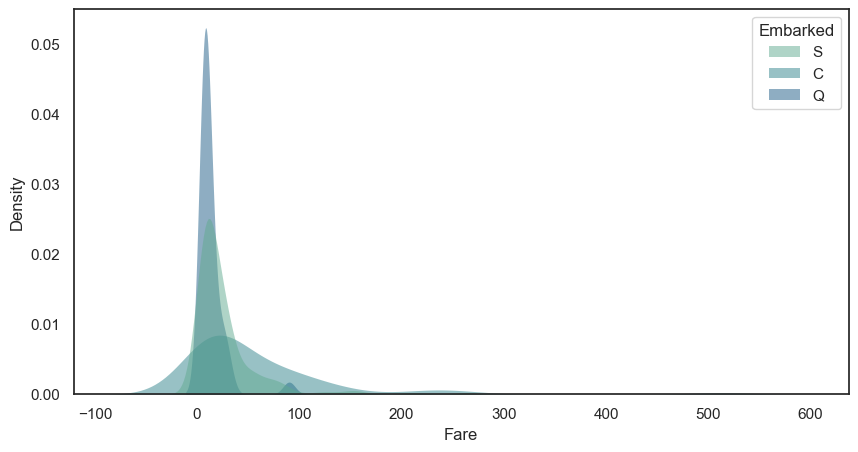

In [66]:
plt.figure(figsize=(10,5))
sns.kdeplot(
   data=titanic_df, x="Fare", hue="Embarked",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
);

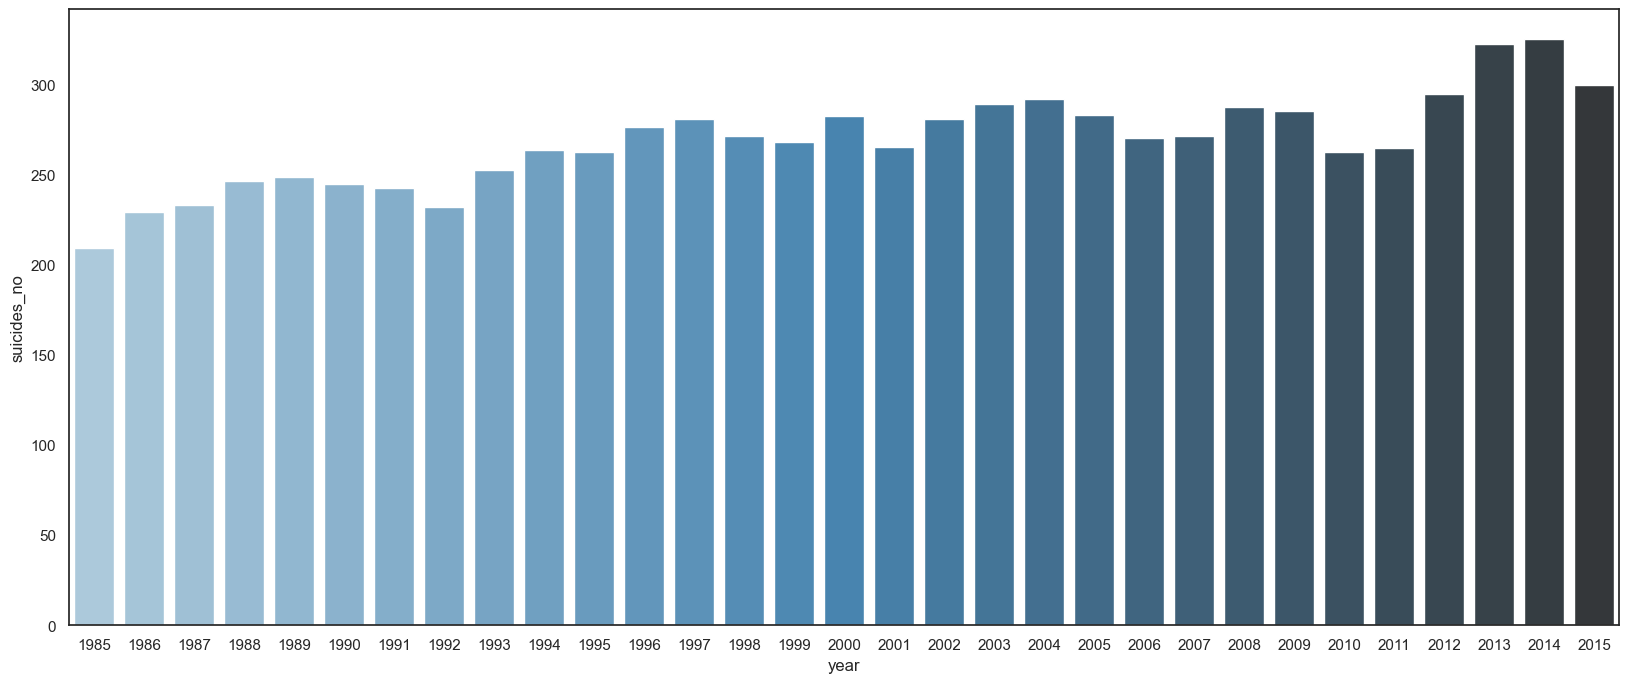

In [67]:
suicid_df2 = suicid_df[suicid_df['country'] == 'Spain']

plt.figure(figsize=(20,8))
sns.barplot(x = 'year',
           y = 'suicides_no',
           palette = 'Blues_d',
           data = suicid_df2,
           ci = None);

In [68]:
df1 = suicid_df.groupby('country').sum()['suicides_no']
df2 = suicid_df[suicid_df['gdp_per_capita ($)'] > 10000].groupby('country').sum()['suicides_no']
df1 = df1[df1.index.isin(df2.index)]

df_tot = pd.DataFrame({"Tot_suicide": df1, "Suicide_gdp": df2}).sort_values("Tot_suicide", ascending=False)[:20]
df_tot.reset_index(level=0, inplace=True)

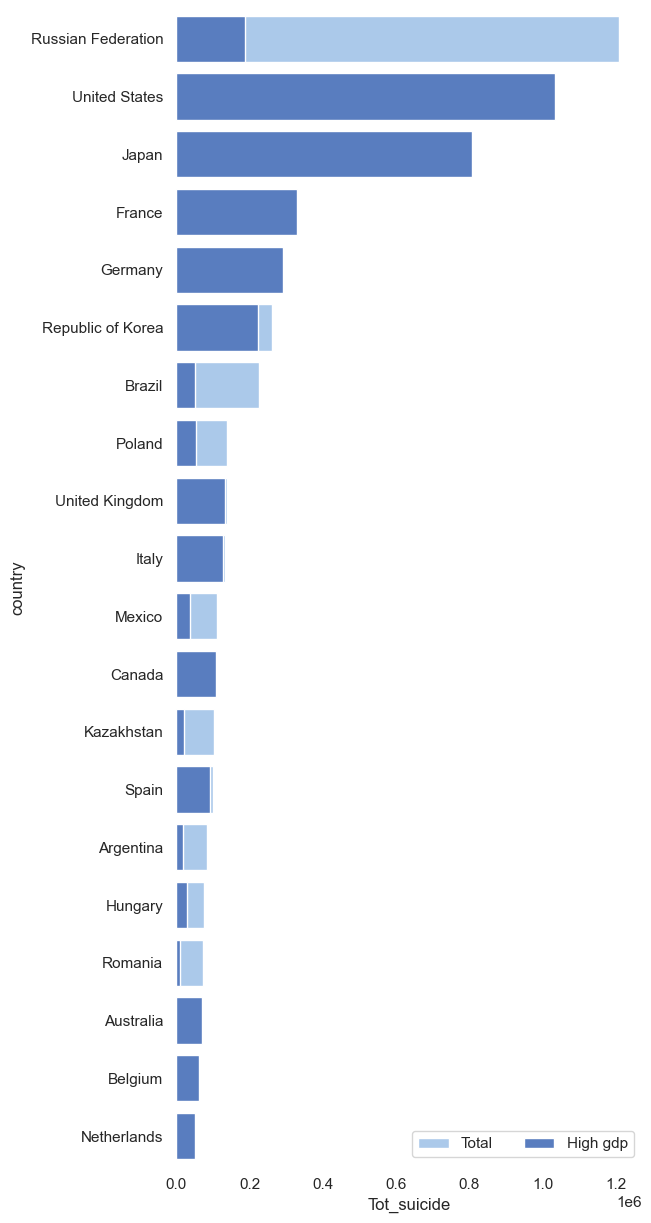

In [69]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Tot_suicide", y="country", data=df_tot,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Suicide_gdp", y="country", data=df_tot,
            label="High gdp", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)